## 样本准备

In [177]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pyhive import hive
import pandas as pd
import numpy as np

conn = hive.Connection(host='172.30.2.60', port=10000, database='recsys')

In [150]:

train_sql = """select * from recsys.search_full_link_30d  where resource_id is not null and user_id is not null"""
train_data = pd.read_sql(train_sql, conn)
conn.close()
train_data.columns = [i.split('.')[1] for i in list(train_data.columns)]

In [151]:
train_data.head(10)

,click_label,user_id,resource_id,resource_type,sex,role,age,total_show,total_click,total_share,total_vote,total_collection,total_comment,log_date
0,0,211e5d05-acf1-4417-9bc4-644e935672fd,105860700000,ARTICLE,None,2,None,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-06
1,0,211e5d05-acf1-4417-9bc4-644e935672fd,17389,VIDEO,None,2,None,3397.0,566.0,0.0,2.0,1.0,0.0,2022-11-06
2,0,211e5d05-acf1-4417-9bc4-644e935672fd,17450,VIDEO,None,2,None,416.0,27.0,0.0,9.0,3.0,2.0,2022-10-26
3,0,211e5d05-acf1-4417-9bc4-644e935672fd,32524,NEWS,None,2,None,318.0,41.0,4.0,9.0,5.0,0.0,2022-11-06
4,0,211e5d05-acf1-4417-9bc4-644e935672fd,34007,NEWS,None,2,None,134.0,18.0,5.0,3.0,2.0,0.0,2022-11-06
5,0,211e5d05-acf1-4417-9bc4-644e935672fd,34019,NEWS,None,2,None,16.0,0.0,0.0,0.0,0.0,0.0,2022-11-06
6,0,211e5d05-acf1-4417-9bc4-644e935672fd,34020,NEWS,None,2,None,19.0,4.0,0.0,1.0,1.0,0.0,2022-11-06
7,0,211e5d05-acf1-4417-9bc4-644e935672fd,101,BANNER_GROUP,None,2,None,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-06
8,0,211e5d05-acf1-4417-9bc4-644e935672fd,101,BANNER_GROUP,None,2,None,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-20
9,0,211e5d05-acf1-4417-9bc4-644e935672fd,101,BANNER_GROUP,None,2,None,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26


In [152]:
train_data.shape

(317596, 14)

In [178]:
dt_sql = """select distinct log_date from recsys.search_full_link_30d"""
dt_data = pd.read_sql(dt_sql, conn)


In [180]:
dt_data.to_csv('dt.csv')

In [155]:
num_train_data = train_data[['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']]

In [156]:
num_train_data = num_train_data.fillna(0)

In [184]:
num_train_data.shape

(317596, 6)

<AxesSubplot:>

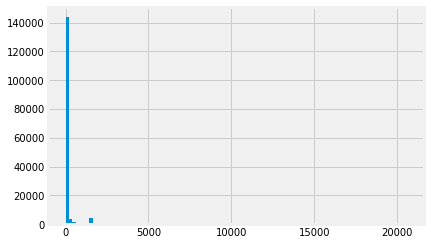

In [187]:
num_train_data['total_share'].hist(bins=100)

## 缺失率统计

In [112]:
# import pandas as pd
# mHeader = ['age','city_id','hospital_id']
# rowDF = pd.read_csv('./data/raw_data.csv', sep=',', skiprows=[0],names=mHeader)

# 传入列表头，输出特征的缺失率
def get_null_rate(featureCol, DF):
    # 统计每列的缺失率,获取总数
    totalRows = DF.shape[0]
    tempCount = 1-(DF[featureCol].where(DF[featureCol] != 'None').count()/totalRows)
    return round(tempCount*100, 2)

In [ ]:
# 推荐缺失值

In [113]:
featureCols =['click_label', 'user_id', 'resource_id', 'resource_type', 'sex', 'role',
       'age', 'total_show', 'total_click', 'total_share', 'total_vote',
       'total_collection', 'total_comment', 'log_date']
  
for col in featureCols:
    print('{}={}%'.format(col, get_null_rate(col, train_data)))

click_label=0.0%
user_id=0.0%
resource_id=0.04%
resource_type=0.0%
sex=17.47%
role=0.0%
age=100.0%
total_show=0.04%
total_click=0.04%
total_share=0.04%
total_vote=0.04%
total_collection=0.04%
total_comment=0.04%
log_date=0.0%


## 数值大小整体预览

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

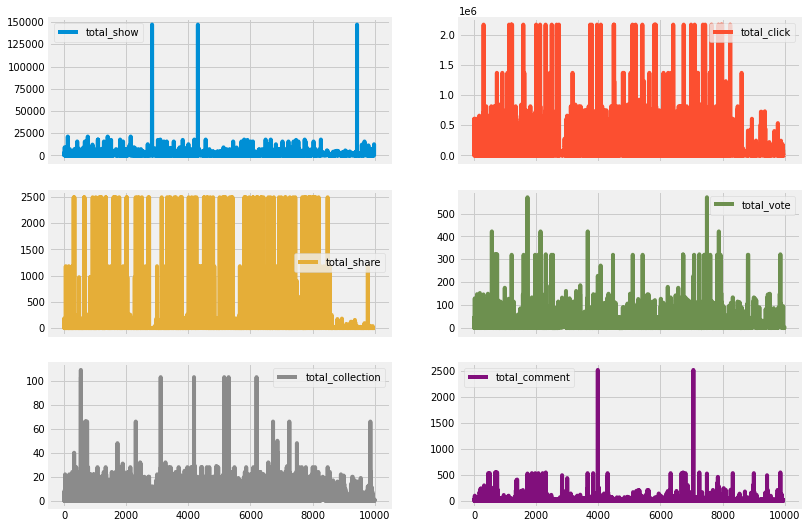

In [121]:
num_data.plot(subplots=True, layout=(3,2), sharex=True ,figsize=(12,9))

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

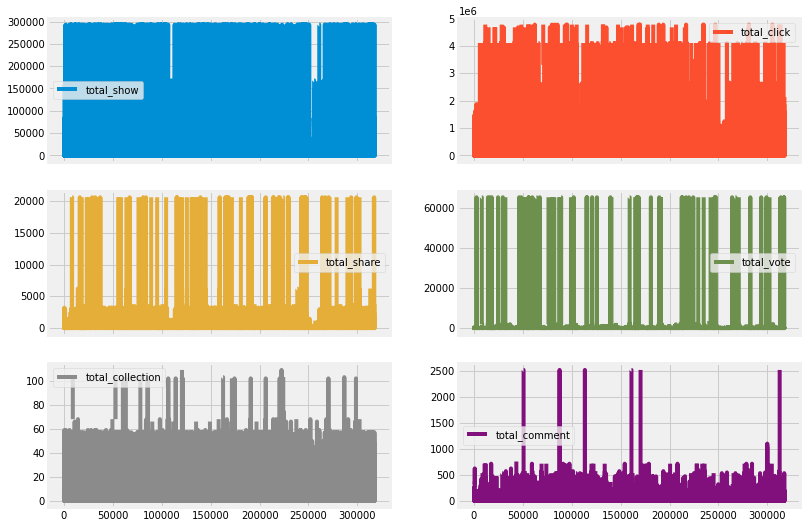

In [188]:
num_train_data.plot(subplots=True, layout=(3,2), sharex=True ,figsize=(12,9))

## 数值大小细节概览

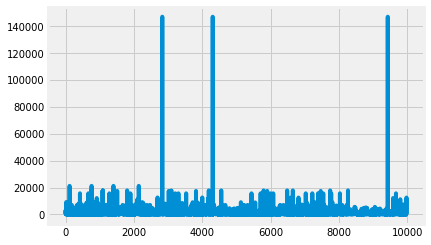

In [122]:
num_data = train_data[['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']]
def data_over_view(dataframe, col_name):
    dataframe[col_name].plot(subplots=True)
# cols = ['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']
cols =['total_show']
for col in cols:
    data_over_view(num_data, col)

## 频率分布直方图

In [168]:
num_train_data = train_data[['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']]

<AxesSubplot:>

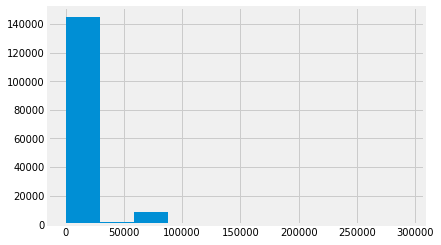

In [171]:
num_train_data['total_show'].hist()

## 皮尔逊相关性系数
Pearson相关系数的范围是在[-1,1]之间，下面给出Pearson相关系数的应用理解：
假设有X，Y两个变量，那么有：
(1) 当相关系数为0时，X变量和Y变量不相关；
(2) 当X的值和Y值同增或同减，则这两个变量正相关，相关系数在0到1之间；
(3) 当X的值增大，而Y值减小，或者X值减小而Y值增大时两个变量为负相关，相关系数在-1到0之间。
注：相关系数的绝对值越大，相关性越强，相关系数越接近于1或-1，相关度越强，相关系数越接近于0，相关度越弱。通常情况下通过以下取值范围判断变量的相关强度：
0.8-1.0 极强相关
0.6-0.8 强相关
0.4-0.6 中等程度相关
0.2-0.4 弱相关
0.0-0.2 极弱相关或无相关

In [123]:
# 输入特征列和标签列，输出列名对应的皮尔逊系数
# 分别计算每个特征与标签的相关系数
from scipy.stats import pearsonr
def calc_pearsonr(dataframe, col_name, label_name):
    
    x = dataframe[col_name].values
    label = dataframe[label_name].values
    p = pearsonr(x, label)[0]
    print("%s 和Label的系数 = %s"%(col_name, p))

In [124]:
train_data_fillna = train_data.fillna(0)
featureCols =['total_show', 'total_click', 'total_share', 'total_vote',
       'total_collection', 'total_comment']
for col in featureCols:
    calc_pearsonr(train_data_fillna, col, 'click_label')

total_show 和Label的系数 = -0.02418875134961658
total_click 和Label的系数 = -0.07942286768376286
total_share 和Label的系数 = -0.04204700458418045
total_vote 和Label的系数 = -0.04246059351624654
total_collection 和Label的系数 = -0.043361133083929235
total_comment 和Label的系数 = -0.023291028680731327


In [126]:
num_data =train_data_fillna[['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']]

In [127]:
num_data['rn'] = list(range(num_data.shape[0]))

/root/anaconda3/envs/es_wyp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
num_data.head(3)

,total_show,total_click,total_share,total_vote,total_collection,total_comment,rn
0,3397.0,566.0,0.0,2.0,1.0,0.0,0
1,416.0,27.0,0.0,9.0,3.0,2.0,1
2,227.0,17.0,0.0,1.0,0.0,0.0,2


In [82]:
def data_over_view(dataframe, col_name):
    dataframe[col_name].plot()

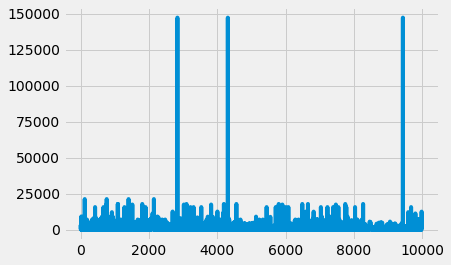

In [84]:
# cols = ['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']
cols =['total_show']
for col in cols:
    data_over_view(num_data, col)

## 查看正负样本的分布

In [130]:
def sample_district(dataframe, col_name, label):
    dataframe['rn'] = list(range(dataframe.shape[0]))
    rm_exception = dataframe[['rn',col_name]]
    rm_exception[col_name] = rm_exception[col_name].apply(lambda x: 100 if x>23000 else x)
    X = rm_exception[['rn',col_name]].values
    y = train_data[label]

    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()
    

/root/anaconda3/envs/es_wyp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/root/anaconda3/envs/es_wyp/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


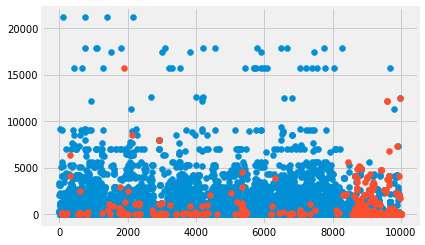

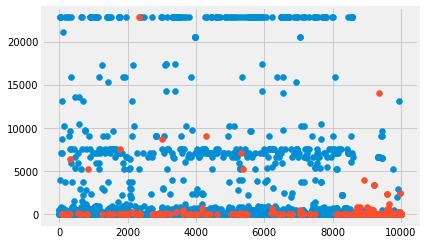

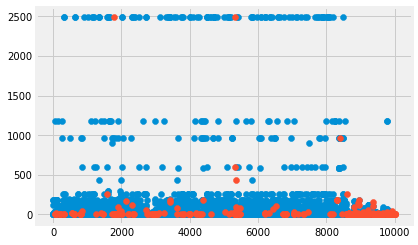

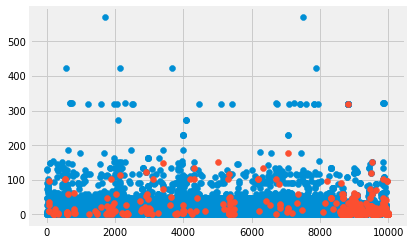

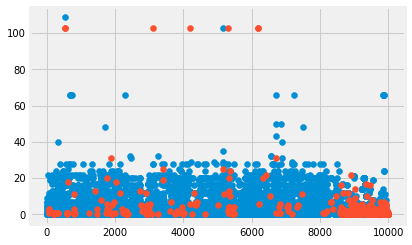

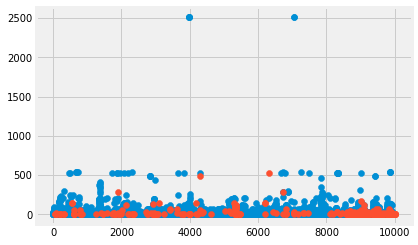

In [132]:
featureCols = ['total_show', 'total_click', 'total_share', 'total_vote','total_collection', 'total_comment']
  
for col in featureCols:
    sample_district(num_data, col, 'click_label')